In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Fetch historical data
def fetch_data(ticker='AAPL', period='2y', interval='1d'):
    df = yf.download(ticker, period=period, interval=interval)
    df.dropna(inplace=True)
    return df

# Step 2: Calculate SMA and EMA
def calculate_ma(df, sma_period=50, ema_period=20):
    df['SMA'] = df['Close'].rolling(window=sma_period).mean()
    df['EMA'] = df['Close'].ewm(span=ema_period, adjust=False).mean()
    return df

# Step 3: Plot MA with price
def plot_ma(df, ticker='AAPL'):
    plt.figure(figsize=(12, 5))
    plt.plot(df.index, df['Close'], label='Close Price', color='black')
    plt.plot(df.index, df['SMA'], label='SMA (50)', color='blue')
    plt.plot(df.index, df['EMA'], label='EMA (20)', color='orange')
    plt.title(f'{ticker} - Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Step 4: Run the module
# if __name__ == "__main__":
#     ticker = 'TCS.NS'  # You can change this to any stock symbol
#     df = fetch_data(ticker)
#     df = calculate_ma(df)
#     plot_ma(df, ticker)

In [2]:
# Step 2: Calculate MACD
def calculate_macd(df, fast=12, slow=26, signal=9):
    ema_fast = df['Close'].ewm(span=fast, adjust=False).mean()
    ema_slow = df['Close'].ewm(span=slow, adjust=False).mean()
    df['MACD'] = ema_fast - ema_slow
    df['Signal'] = df['MACD'].ewm(span=signal, adjust=False).mean()
    df['Histogram'] = df['MACD'] - df['Signal']
    return df

# Step 3: Plot MACD
def plot_macd(df, ticker='AAPL'):
    plt.figure(figsize=(12, 5))
    plt.plot(df.index, df['MACD'], label='MACD Line', color='blue')
    plt.plot(df.index, df['Signal'], label='Signal Line', color='orange')
    plt.bar(df.index, df['Histogram'], label='Histogram', color='gray', width=1.5)
    plt.title(f'{ticker} - MACD Indicator')
    plt.xlabel('Date')
    plt.ylabel('MACD Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Step 4: Run the module
# if __name__ == "__main__":
#     ticker = 'TCS.NS'  # You can change this
#     df = fetch_data(ticker)
#     df = calculate_macd(df)
#     plot_macd(df, ticker)

C:\Users\heman_q\AppData\Local\Temp\ipykernel_11748\1259338010.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)
[*********************100%***********************]  1 of 1 completed


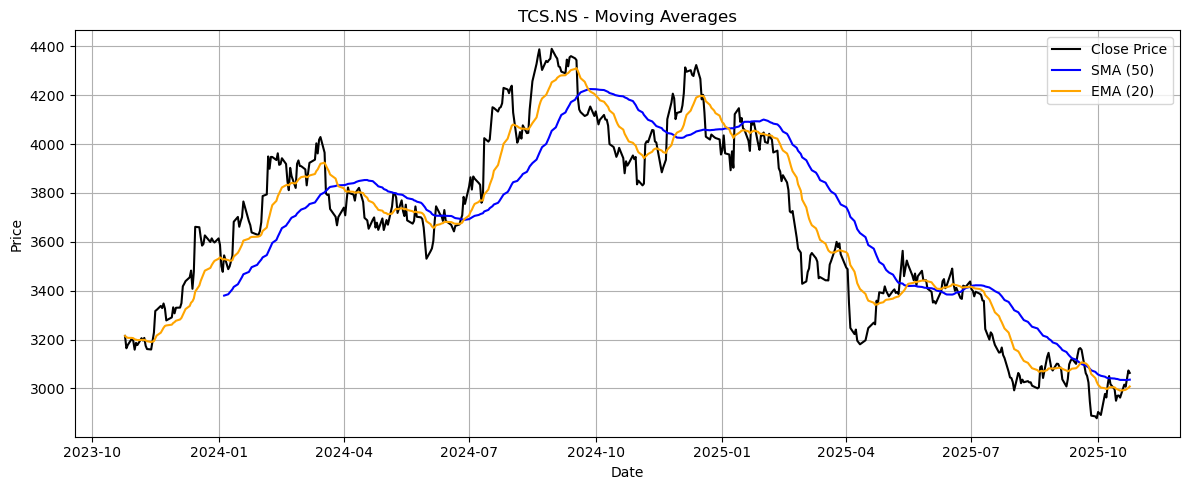

C:\Users\heman_q\AppData\Local\Temp\ipykernel_11748\1259338010.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)
[*********************100%***********************]  1 of 1 completed


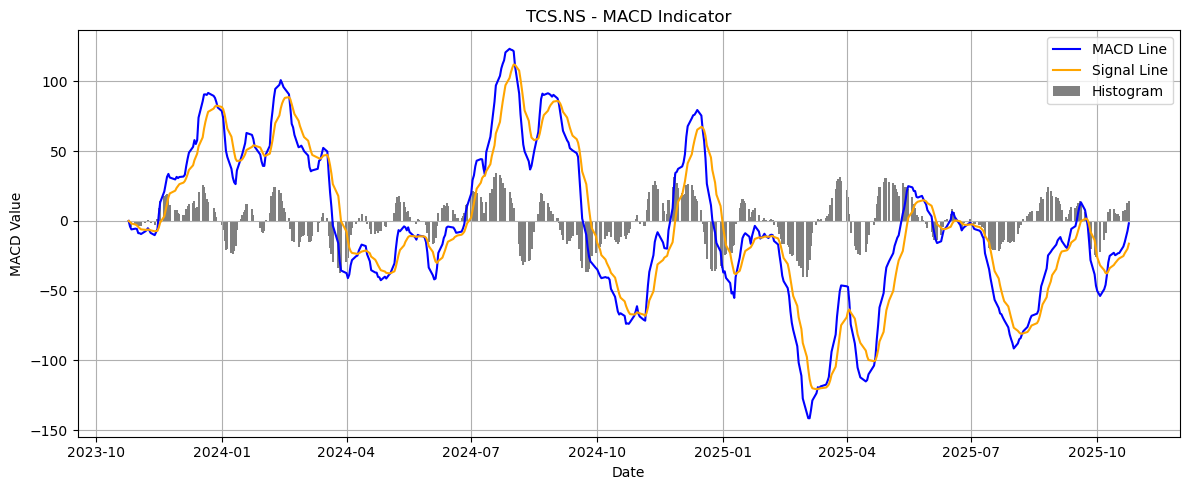

In [3]:
# Step 4: Run the module
if __name__ == "__main__":
    ticker = 'TCS.NS'  # You can change this to any stock symbol
    df = fetch_data(ticker)
    df = calculate_ma(df)
    plot_ma(df, ticker)


# Step 4: Run the module
if __name__ == "__main__":
    ticker = 'TCS.NS'  # You can change this
    df = fetch_data(ticker)
    df = calculate_macd(df)
    plot_macd(df, ticker)